# Import library

In [580]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from datetime import datetime, date
from numpy import sqrt, sin, cos, arcsin, arccos, radians, abs

# Import data

In [581]:
dirty_data = pd.read_csv('./dirty_data.csv')
warehouses_data = pd.read_csv('./warehouses.csv')

# Check for null data

In [582]:
dirty_data.isna().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           1
is_happy_customer                0
dtype: int64

# Check for Order ID

In [583]:
print(f'Order id is unique: {dirty_data.order_id.is_unique}')

Order id is unique: True


# Check customer ID

In [584]:
print(f'Customer id is unique: {dirty_data.customer_id.is_unique}')

Customer id is unique: False


In [585]:
dirty_data['customer_id'].unique

<bound method Series.unique of 0      ID6197211592
1      ID0282825849
2      ID0579391891
3      ID4544561904
4      ID6231506320
           ...     
495    ID0247417082
496    ID0130015098
497    ID2707985442
498    ID0060088412
499    ID5257193650
Name: customer_id, Length: 500, dtype: object>

# Check for date

In [586]:
error_date_index = [i for i in range(len(dirty_data)) if not dirty_data.loc[i,'date'][2].isdecimal()]
print(error_date_index)

[43, 78, 114, 124, 136, 162, 168, 186, 242, 254, 275, 285, 326, 346, 354, 392, 438, 456, 476, 496]


In [587]:
for i in range(len(dirty_data)):
    test_date = dirty_data.loc[i, 'date']
    if not test_date[2].isdecimal():
        if int(test_date[0:2]) in {'Spring':[9, 10, 11], 'Summer':[12, 1, 2], 'Autumn':[3, 4, 5], 'Winter':[6, 7, 8]}.get(dirty_data.loc[i, 'season']):
            dirty_data.loc[i, 'date'] = datetime.strptime(test_date, f'%m{test_date[2]}%d{test_date[2]}%Y').date().__format__('%Y-%m-%d')
        else:
            dirty_data.loc[i, 'date'] = datetime.strptime(test_date, f'%d{test_date[2]}%m{test_date[2]}%Y').date().__format__('%Y-%m-%d')

In [588]:
error_date_index = [i for i in range(len(dirty_data)) if not dirty_data.loc[i,'date'][2].isdecimal()]
print(error_date_index)

[]


In [589]:
dirty_data.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object

In [590]:
dirty_data['date'] = pd.to_datetime(dirty_data['date'])

In [591]:
dirty_data.dtypes

order_id                                 object
customer_id                              object
date                             datetime64[ns]
nearest_warehouse                        object
shopping_cart                            object
order_price                               int64
delivery_charges                        float64
customer_lat                            float64
customer_long                           float64
coupon_discount                           int64
order_total                             float64
season                                   object
is_expedited_delivery                      bool
distance_to_nearest_warehouse           float64
latest_customer_review                   object
is_happy_customer                          bool
dtype: object

# Check for season

In [592]:
dirty_data['season'].unique()

array(['Winter', 'Summer', 'Autumn', 'Spring', 'winter', 'spring',
       'autumn', 'summer'], dtype=object)

There are four uncapital season string in array.  
Therefore we need to capitalize all seasons that  
are not in capital format

In [593]:
# count number of season that in wrong format
dirty_data.groupby('season')['date'].count()

season
Autumn    124
Spring    133
Summer    121
Winter    110
autumn      3
spring      1
summer      3
winter      5
Name: date, dtype: int64

In [594]:
# wrong format season
error_season:list = [i for i in dirty_data['season'].unique() if i not in ['Spring', 'Summer', 'Autumn', 'Winter']]
print(error_season)

['winter', 'spring', 'autumn', 'summer']


In [595]:
# Capitalize all data in season column
for i in range(len(dirty_data)):
    if dirty_data.loc[i, 'season'] in error_season:
        dirty_data.loc[i, 'season']=dirty_data.loc[i, 'season'].title()

In [596]:
# Count again if there are any wrong format season
dirty_data.groupby('season')['date'].count()

season
Autumn    127
Spring    134
Summer    124
Winter    115
Name: date, dtype: int64

Text(0.5, 1.0, 'Winter')

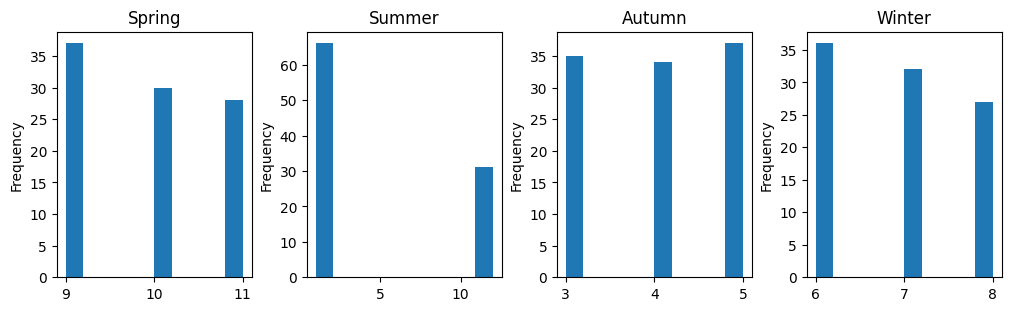

In [662]:
# Plot histogram of date group by seasons
fig = plt.figure(figsize=(10,3), layout='constrained')
plt.subplot(1,4,1)
dirty_data[dirty_data['season'] == 'Spring']['date'].dt.month.plot.hist()
plt.title('Spring')
plt.subplot(1,4,2)
dirty_data[dirty_data['season'] == 'Summer']['date'].dt.month.plot.hist()
plt.title('Summer')
plt.subplot(1,4,3)
dirty_data[dirty_data['season'] == 'Autumn']['date'].dt.month.plot.hist()
plt.title('Autumn')
plt.subplot(1,4,4)
dirty_data[dirty_data['season'] == 'Winter']['date'].dt.month.plot.hist()
plt.title('Winter')

<Axes: title={'center': 'month'}, xlabel='[season]'>

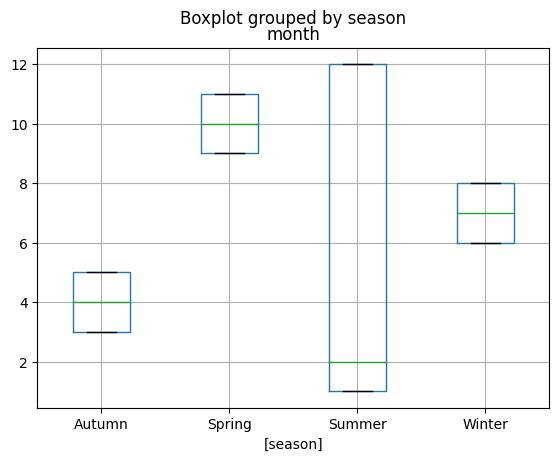

In [663]:
# Boxplot distribution of date group by seasons
month_season = pd.DataFrame(dirty_data['date'].dt.month.to_list(), columns=['month'])
month_season['season'] = dirty_data['season'].to_list()
month_season.boxplot(by='season')

From the above histogram plot and boxplot, we can easily aware that Autumn is last  
from March to May, Winter is from June to August and Spring is between September  
and November. As a result, Summer would be the periode from December to February.

In [599]:
# Define months of vary seasons as a dictionary
seasons:dict = {'Spring':[9, 10, 11], 'Summer':[12, 1, 2], 'Autumn':[3, 4, 5], 'Winter':[6, 7, 8]}

In [600]:
# Find the rows that have wrong season comparing with date
error_season = [i for i in range(len(dirty_data)) if dirty_data.loc[i,'date'].month not in seasons.get(dirty_data.loc[i, 'season'])]
print(error_season)

[9, 21, 34, 64, 82, 94, 102, 111, 135, 209, 215, 219, 236, 300, 350, 368, 381, 454, 467, 485]


In [601]:
# Replace wrong season in the error list
for i in error_season:
    month = dirty_data.loc[i, 'date'].month
    if month in [9, 10, 11] : season = 'Spring'
    elif month in [12, 1, 2] : season = 'Summer'
    elif month in [3, 4, 5] : season = 'Autumn'
    else : season = 'Winter'
    dirty_data.loc[i, 'season'] = season

In [602]:
# Check again
error_season = [i for i in range(len(dirty_data)) if dirty_data.loc[i,'date'].month not in seasons.get(dirty_data.loc[i, 'season'])]
print(error_season)

[]


# Check Customer latitude

In [603]:
dirty_data['customer_lat'].describe()

count    500.000000
mean     -35.835234
std       12.045393
min      -37.827123
25%      -37.818222
50%      -37.812165
75%      -37.805364
max       37.826339
Name: customer_lat, dtype: float64

<Axes: >

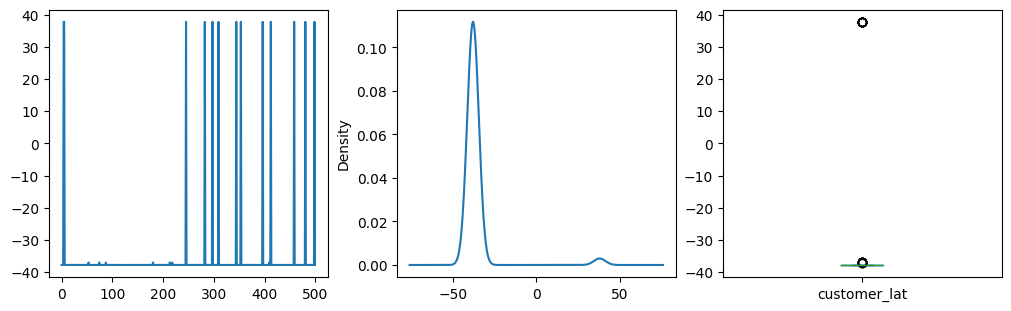

In [604]:
fig = plt.figure(figsize=(10,3), layout='constrained')
plt.subplot(1,3,1)
plt.plot(dirty_data['customer_lat'])
plt.subplot(1,3,2)
dirty_data['customer_lat'].plot.kde()
plt.subplot(1,3,3)
dirty_data['customer_lat'].plot.box()

In [605]:
IQR = dirty_data['customer_lat'].quantile(0.75) - dirty_data['customer_lat'].quantile(0.25)
lo_lim = dirty_data['customer_lat'].quantile(0.25) - 1.5*IQR
hi_lim = dirty_data['customer_lat'].quantile(0.75) + 1.5*IQR

In [606]:
#lo_lim = dirty_data['customer_lat'].mean() - 1.5*dirty_data['customer_lat'].std()
#hi_lim = dirty_data['customer_lat'].mean() + 1.5*dirty_data['customer_lat'].std()
inapproriated_lat = dirty_data['customer_lat'].loc[np.logical_or(dirty_data['customer_lat'] > hi_lim, dirty_data['customer_lat'] < lo_lim)].index.to_list()
print(inapproriated_lat)

[4, 5, 53, 74, 87, 180, 213, 218, 245, 282, 297, 309, 344, 353, 396, 409, 412, 458, 480, 498]


In [607]:
dirty_data.loc[inapproriated_lat, 'customer_lat']

4      37.823859
5      37.820245
53    -37.026656
74    -37.024913
87    -37.091626
180   -37.044996
213   -37.020195
218   -37.064563
245    37.823093
282    37.804518
297    37.826339
309    37.791485
344    37.808119
353    37.810246
396    37.815897
409   -37.054867
412    37.807469
458    37.823507
480    37.804082
498    37.820071
Name: customer_lat, dtype: float64

# Check for Customer longitude

In [608]:
dirty_data['customer_long'].describe()

count    500.000000
mean     144.969494
std        0.022720
min      144.924967
25%      144.953488
50%      144.965357
75%      144.983985
max      145.019837
Name: customer_long, dtype: float64

<Axes: >

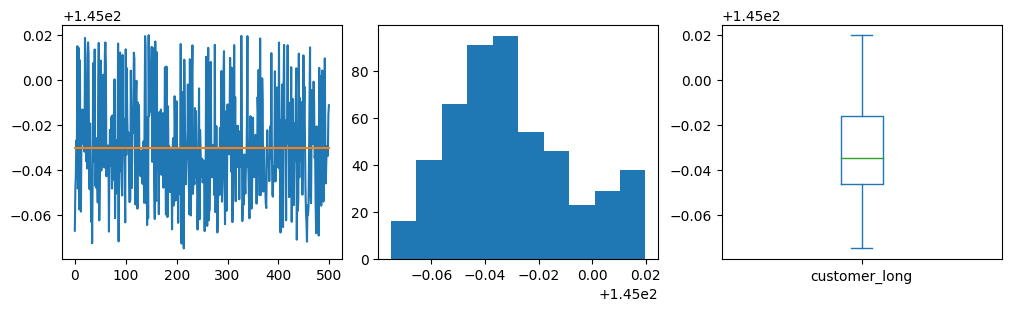

In [609]:
fig = plt.figure(figsize=(10,3), layout='constrained')
plt.subplot(1,3,1)
plt.plot(dirty_data['customer_long'])
plt.plot([0, len(dirty_data)], [dirty_data['customer_long'].mean(), dirty_data['customer_long'].mean()])
plt.subplot(1,3,2)
plt.hist(dirty_data['customer_long'])
plt.subplot(1,3,3)
dirty_data['customer_long'].plot.box()

# Check the nearest warehouse

In [610]:
print(f'Nearest warehouse is unique: {dirty_data.nearest_warehouse.is_unique}')

Nearest warehouse is unique: False


In [611]:
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

## Fix wrong warehouse's name

In [612]:
error_warehouses:list = [i for i in dirty_data['nearest_warehouse'].dropna().unique() if i not in list(warehouses_data['names'])]
print(error_warehouses)

['nickolson', 'thompson']


In [613]:
for i in range(len(dirty_data)):
    if dirty_data.loc[i, 'nearest_warehouse'] in error_warehouses:
        dirty_data.loc[i, 'nearest_warehouse']=dirty_data.loc[i, 'nearest_warehouse'].title()

In [614]:
dirty_data['nearest_warehouse'].unique()

array(['Thompson', 'Nickolson', 'Bakers'], dtype=object)

## Check if Warehouse is the nearest one

In [615]:
warehouse_check: list = []
true_warehouse: list = []
for i in range(len(dirty_data)):
    [lat, lon] = dirty_data.loc[i, ['customer_lat', 'customer_long']]
    distance = [arccos(sin(radians(lat))*sin(radians(warehouses_data.iloc[t,1])) 
                + cos(radians(lat))*cos(radians(warehouses_data.iloc[t,1]))
                *cos(radians(warehouses_data.iloc[t,2] - lon)))*6371 
                for t in range(3)]
    warehouse = warehouses_data.iloc[distance.index(min(distance)), 0]
    true_warehouse.append(warehouse)
    warehouse_check.append(dirty_data.loc[i, 'nearest_warehouse'] == warehouse)

In [616]:
warehouse_error = [i for i in range(len(warehouse_check)) if not warehouse_check[i]]

In [617]:
warehouse_error = [i for i in warehouse_error if i not in inapproriated_lat] # exclude data cause by the unusal value of customer latitude

In [618]:
for i in warehouse_error:
    dirty_data.loc[i, 'nearest_warehouse'] = true_warehouse[i]

In [619]:
dirty_data.groupby(by='nearest_warehouse')['order_id'].count()

nearest_warehouse
Bakers       136
Nickolson    176
Thompson     188
Name: order_id, dtype: int64

# Check for Distance to nearest warehouse

## Geographic distance between 2 location formula

$\begin{equation} \boxed{ d = \displaystyle 2r \cdot \arcsin{ \sqrt{ \sin{ \left( \frac{lat1 - lat2}{2} \right)}^2 + \cos{\left( lat1 \right)} \cdot \cos{\left(lat2\right)} \cdot \sin{\left( \frac{long1 - long2}{2} \right)}^2}} } \end{equation}$

or 

$\begin{equation} \boxed{d = \displaystyle \arccos{\Big[ \sin{(lat1)} \cdot \sin{(lat2)} + \cos{(lat1)} \cdot \cos{(lat2)} \cdot \cos{(long2 - long1)} \Big] \cdot r} } \end{equation}$

## Check if the distance is correct

In [620]:
dirty_data['distance_to_nearest_warehouse'].describe()

count    500.000000
mean       2.204224
std        8.812416
min        0.107800
25%        0.751425
50%        1.030100
75%        1.408625
max       94.973400
Name: distance_to_nearest_warehouse, dtype: float64

<Axes: >

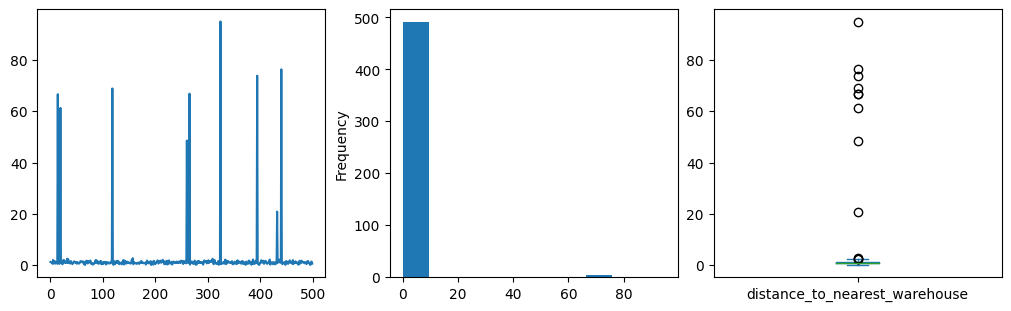

In [621]:
fig = plt.figure(figsize=(10,3),layout='constrained')
plt.subplot(1,3,1)
plt.plot(dirty_data['distance_to_nearest_warehouse'])
plt.subplot(1,3,2)
dirty_data['distance_to_nearest_warehouse'].plot.hist()
plt.subplot(1,3,3)
dirty_data['distance_to_nearest_warehouse'].plot.box()

In [622]:
IQR = dirty_data['distance_to_nearest_warehouse'].quantile(0.75) - dirty_data['distance_to_nearest_warehouse'].quantile(0.25)
lo_lim = dirty_data['distance_to_nearest_warehouse'].quantile(0.25) - 1.5*IQR
hi_lim = dirty_data['distance_to_nearest_warehouse'].quantile(0.75) + 1.5*IQR

In [623]:
#dis_lo_lim = dirty_data['distance_to_nearest_warehouse'].mean() - 2*dirty_data['distance_to_nearest_warehouse'].std()
#dis_hi_lim = dirty_data['distance_to_nearest_warehouse'].mean() + 2*dirty_data['distance_to_nearest_warehouse'].std()
inapproriated_dis = dirty_data['distance_to_nearest_warehouse'].loc[
                    np.logical_or(dirty_data['distance_to_nearest_warehouse'] > dis_hi_lim, 
                                  dirty_data['distance_to_nearest_warehouse'] < dis_lo_lim)].index.to_list()
print(inapproriated_dis)

[14, 19, 118, 260, 265, 324, 394, 432, 440]


In [624]:
dirty_data.loc[inapproriated_dis, 'distance_to_nearest_warehouse']

14     66.6483
19     61.2935
118    68.8892
260    48.5984
265    66.8512
324    94.9734
394    73.8324
432    20.8952
440    76.3419
Name: distance_to_nearest_warehouse, dtype: float64

In [625]:
distance_diff :list = []
warehouses_list = warehouses_data.loc[:, 'names'].to_list()
for i in range(len(dirty_data['distance_to_nearest_warehouse'])):
    [lat1, lon1] = dirty_data.loc[i, ['customer_lat', 'customer_long']]
    [lat2, lon2] = warehouses_data.loc[warehouses_list.index(dirty_data.loc[i, 'nearest_warehouse']), ['lat', 'lon']]
    distance = round(2*6371*np.arcsin(sqrt(np.sin(np.radians((lat1 - lat2)/2))**2 
                     + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(np.radians((lon1-lon2)/2))**2)),4)
    distance_diff.append(abs(dirty_data.loc[i, 'distance_to_nearest_warehouse'] - distance))

In [626]:
distance_diff = pd.DataFrame(distance_diff, columns=['distance_diff'])

In [627]:
distance_diff.describe()

,distance_diff
count,500.000000
mean,220.977134
std,1339.069381
min,0.000100
25%,0.000900
50%,0.001200
75%,0.001725
max,8410.470400


<Axes: >

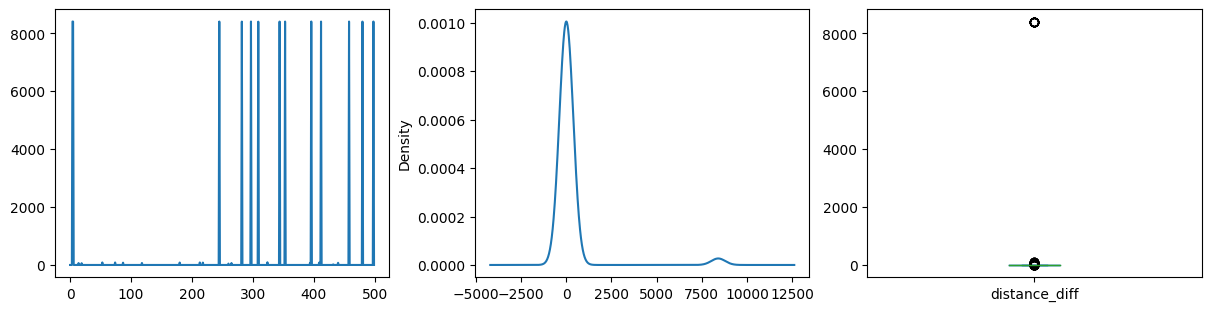

In [628]:
fig = plt.figure(figsize=(12,3), layout='constrained')
plt.subplot(1,3,1)
plt.plot(distance_diff)
plt.subplot(1,3,2)
distance_diff['distance_diff'].plot.kde()
plt.subplot(1,3,3)
distance_diff['distance_diff'].plot.box()

In [629]:
IQR = distance_diff['distance_diff'].quantile(0.75) - distance_diff['distance_diff'].quantile(0.25)
dis_diff_lo_lim = distance_diff['distance_diff'].quantile(0.25) - 1.5*IQR
dis_diff_hi_lim = distance_diff['distance_diff'].quantile(0.75) + 1.5*IQR

In [630]:
#dis_diff_lo_lim = distance_diff['distance_diff'].mean() - 2*distance_diff['distance_diff'].std()
#dis_diff_hi_lim = distance_diff['distance_diff'].mean() + 2*distance_diff['distance_diff'].std()
inapproriated_dis_diff = distance_diff['distance_diff'].loc[
                            np.logical_or(distance_diff['distance_diff'] > dis_diff_hi_lim, 
                                  distance_diff['distance_diff'] < dis_diff_lo_lim)].index.to_list()
print(inapproriated_dis_diff)

[4, 5, 14, 19, 20, 27, 40, 47, 53, 60, 74, 85, 87, 100, 115, 118, 134, 138, 145, 151, 157, 158, 161, 169, 180, 182, 208, 213, 218, 226, 231, 245, 260, 265, 282, 297, 298, 309, 324, 327, 339, 344, 353, 364, 372, 376, 394, 396, 401, 407, 409, 411, 412, 430, 432, 440, 450, 458, 459, 480, 498]


In [631]:
print(f"Number of null value: {distance_diff['distance_diff'].isnull().sum()}")

Number of null value: 0


# Check for Order price

In [632]:
dirty_data['order_price'].describe()

count       500.000000
mean      25522.216000
std       86333.729169
min         585.000000
25%        7050.000000
50%       12807.500000
75%       20360.000000
max      947691.000000
Name: order_price, dtype: float64

<Axes: >

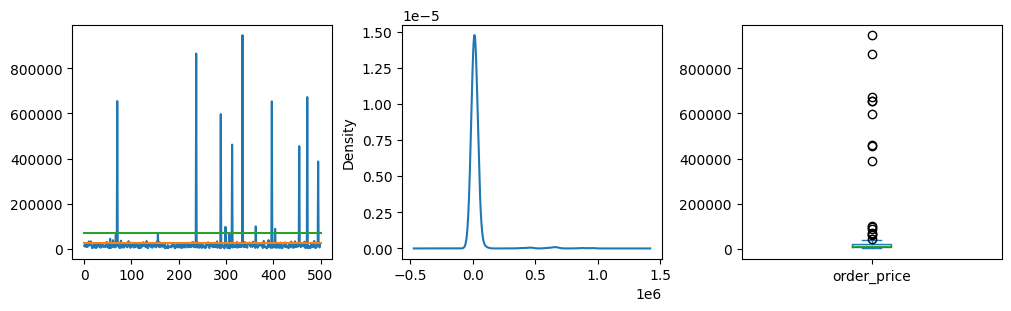

In [633]:
fig = plt.figure(figsize=(10,3), layout='constrained')
plt.subplot(1,3,1)
plt.plot(dirty_data['order_price'])
plt.plot([0,len(dirty_data)],[dirty_data['order_price'].mean(), dirty_data['order_price'].mean()])
plt.plot([0,len(dirty_data)], [dirty_data['order_price'].mean() + 0.5*dirty_data['order_price'].std(), dirty_data['order_price'].mean() + 0.5*dirty_data['order_price'].std()])
plt.subplot(1,3,2)
dirty_data['order_price'].plot.kde()
plt.subplot(1,3,3)
dirty_data['order_price'].plot.box()

In [634]:
IQR = dirty_data['order_price'].quantile(0.75) - dirty_data['order_price'].quantile(0.25)
order_lo_lim = dirty_data['order_price'].quantile(0.25) - 1.5*IQR
order_hi_lim = dirty_data['order_price'].quantile(0.75) + 1.5*IQR

In [635]:
#order_lo_lim = dirty_data['order_price'].mean() - 0.5*dirty_data['order_price'].std()
#order_hi_lim = dirty_data['order_price'].mean() + 0.5*dirty_data['order_price'].std()
inapproriated_order = dirty_data['order_price'].loc[
                            np.logical_or(dirty_data['order_price'] > order_hi_lim, 
                                          dirty_data['order_price'] < order_lo_lim)].index.to_list()
print(inapproriated_order)

[55, 67, 70, 156, 237, 289, 299, 307, 313, 335, 363, 397, 404, 455, 472, 495]


# Check for Delivery charge

In [636]:
dirty_data['delivery_charges'].describe()

count    500.000000
mean      76.658200
std       14.481465
min       46.350000
25%       65.982500
50%       76.310000
75%       82.555000
max      114.040000
Name: delivery_charges, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f92c616bfd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92c60fa550>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f92c616bc40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f92c60fa970>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f92c60fac10>],
 'means': []}

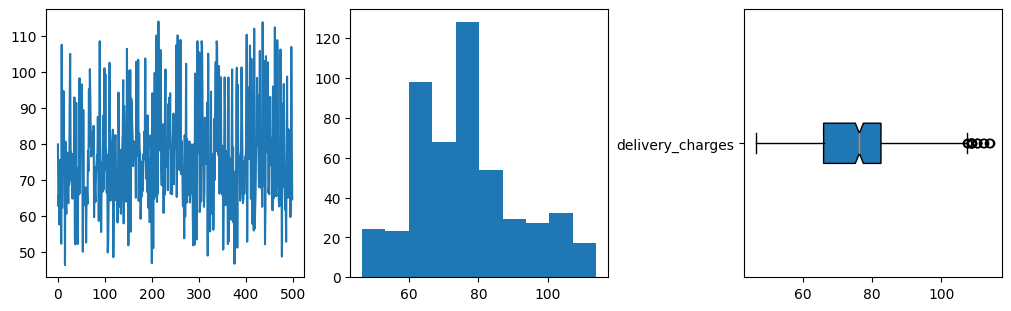

In [637]:
fig = plt.figure(figsize=(10,3), layout='constrained')
plt.subplot(1,3,1)
plt.plot(dirty_data['delivery_charges'])
plt.subplot(1,3,2)
plt.hist(dirty_data['delivery_charges'])
plt.subplot(1,3,3)
plt.boxplot(dirty_data['delivery_charges'], notch=True, vert=False, patch_artist=True, labels=['delivery_charges'])

In [638]:
IQR = dirty_data['delivery_charges'].quantile(0.75) - dirty_data['delivery_charges'].quantile(0.25)
deliverycharge_lo_lim = dirty_data['delivery_charges'].quantile(0.25) - 1.5*IQR
deliverycharge_hi_lim = dirty_data['delivery_charges'].quantile(0.75) + 1.5*IQR

In [639]:
inapproriated_deliverycharge = dirty_data['delivery_charges'].loc[
                                np.logical_or(dirty_data['delivery_charges'] > deliverycharge_hi_lim, 
                                              dirty_data['delivery_charges'] < deliverycharge_lo_lim)].index.to_list()
print(inapproriated_deliverycharge)

[8, 89, 210, 214, 252, 255, 261, 297, 306, 338, 402, 418, 436, 462, 467]


# Check for Order total

In [640]:
dirty_data['order_total'].describe()

count    5.000000e+02
mean     3.920967e+04
std      2.741940e+05
min      6.392900e+02
25%      6.454735e+03
50%      1.129396e+04
75%      1.811919e+04
max      5.688270e+06
Name: order_total, dtype: float64

<Axes: >

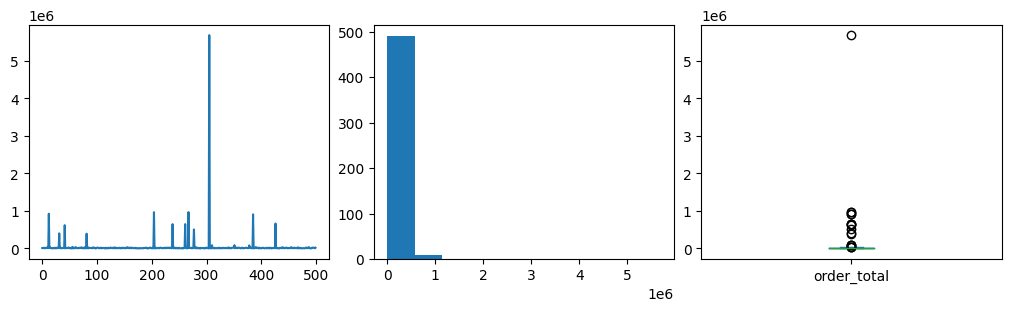

In [641]:
fig = plt.figure(figsize=(10,3), layout='constrained')
plt.subplot(1,3,1)
plt.plot(dirty_data['order_total'])
plt.subplot(1,3,2)
plt.hist(dirty_data['order_total'])
plt.subplot(1,3,3)
dirty_data['order_total'].plot.box()

In [642]:
IQR = dirty_data['order_total'].quantile(0.75) - dirty_data['order_total'].quantile(0.25)
ordertotal_lo_lim = dirty_data['order_total'].quantile(0.25) - 1.5*IQR
ordertotal_hi_lim = dirty_data['order_total'].quantile(0.75) + 1.5*IQR

In [643]:
#ordertotal_lo_lim = dirty_data['order_total'].mean() - 0.5*dirty_data['order_total'].std()
#ordertotal_hi_lim = dirty_data['order_total'].mean() + 0.5*dirty_data['order_total'].std()
inapproriated_ordertotal = dirty_data['order_total'].loc[
                            np.logical_or(dirty_data['order_total'] > ordertotal_hi_lim, 
                                          dirty_data['order_total'] < ordertotal_lo_lim)].index.to_list()
print(inapproriated_ordertotal)

[12, 31, 41, 55, 61, 81, 204, 238, 261, 267, 277, 305, 310, 351, 378, 385, 390, 426]


# Drop inapproriate

{'whiskers': [<matplotlib.lines.Line2D at 0x7f92c5c12190>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92c5c126d0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f92c5c01dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f92c5c12c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f92c5c12eb0>],
 'means': []}

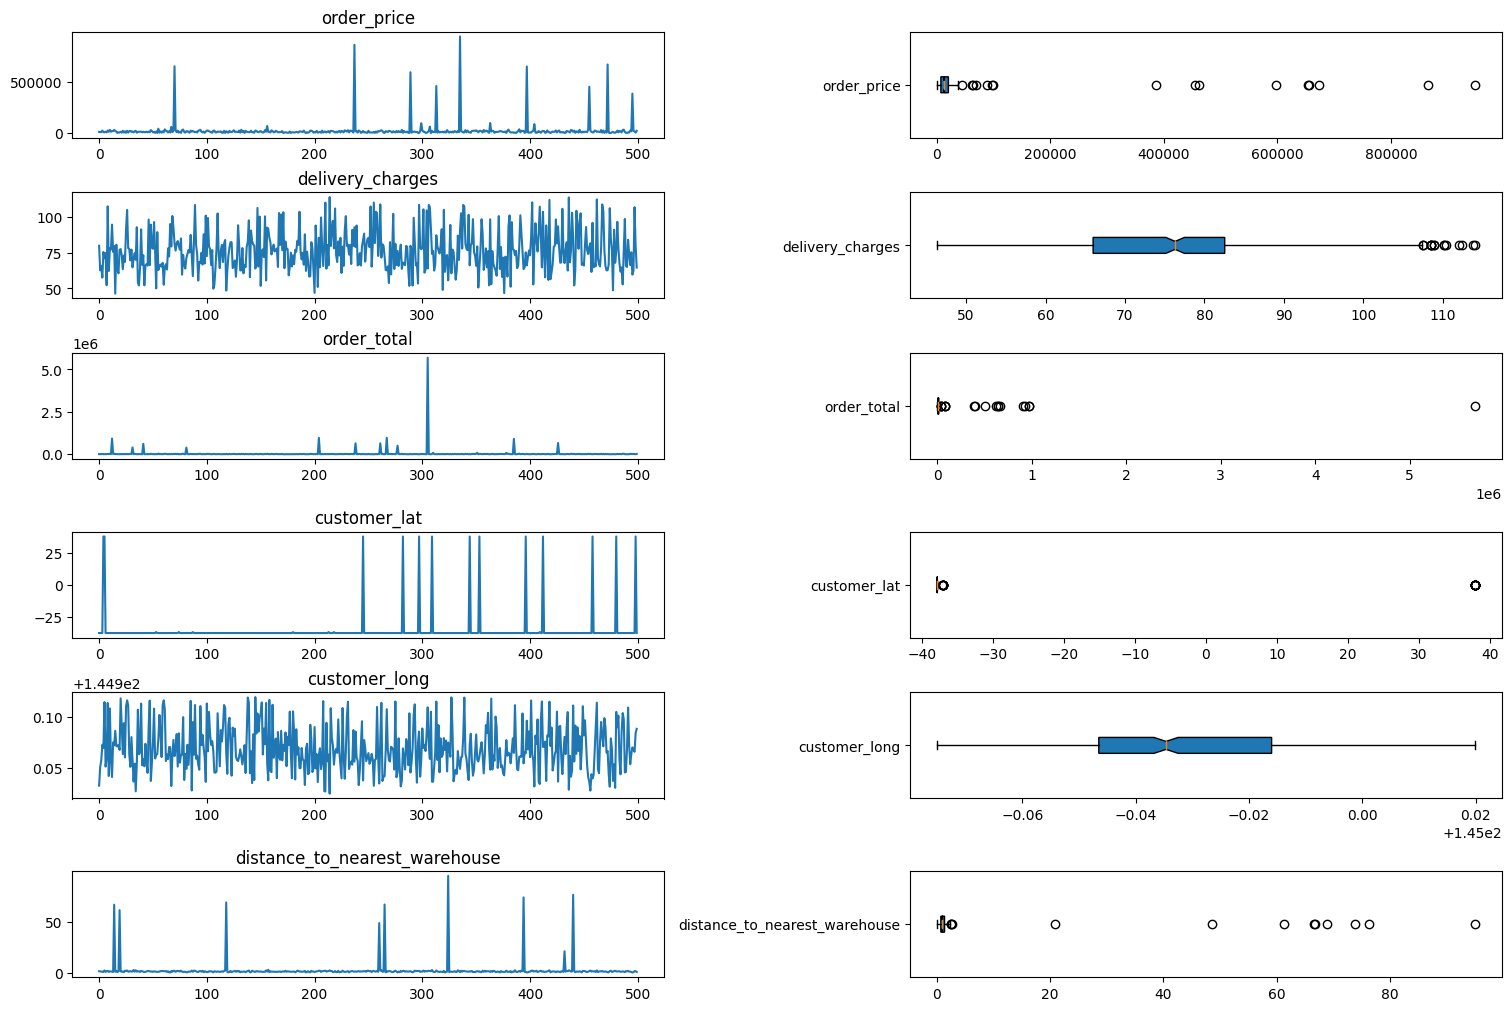

In [644]:
fig = plt.figure(figsize=(15,10), layout='constrained')
gs = GridSpec(nrows=6, ncols=2, figure=fig)
plt.subplot(gs[0,0])
plt.plot(dirty_data['order_price'])
plt.title('order_price')

plt.subplot(gs[0,1])
plt.boxplot(dirty_data['order_price'], notch=True, vert=False, patch_artist=True, labels=['order_price'])
#plt.title('order_price')

plt.subplot(gs[1,0])
plt.plot(dirty_data['delivery_charges'])
plt.title('delivery_charges')

plt.subplot(gs[1,1])
plt.boxplot(dirty_data['delivery_charges'], notch=True, vert=False, patch_artist=True, labels=['delivery_charges'])
#plt.title('delivery_charges')

plt.subplot(gs[2,0])
plt.plot(dirty_data['order_total'])
plt.title('order_total')

plt.subplot(gs[2,1])
plt.boxplot(dirty_data['order_total'], notch=True, vert=False, patch_artist=True, labels=['order_total'])
#plt.title('order_total')

plt.subplot(gs[3,0])
plt.plot(dirty_data['customer_lat'])
plt.title('customer_lat')

plt.subplot(gs[3,1])
plt.boxplot(dirty_data['customer_lat'], notch=True, vert=False, patch_artist=True, labels=['customer_lat'])
#plt.title('customer_lat')

plt.subplot(gs[4,0])
plt.plot(dirty_data['customer_long'])
plt.title('customer_long')

plt.subplot(gs[4,1])
plt.boxplot(dirty_data['customer_long'], notch=True, vert=False, patch_artist=True, labels=['customer_long'])
#plt.title('customer_long')

plt.subplot(gs[5,0])
plt.plot(dirty_data['distance_to_nearest_warehouse'])
plt.title('distance_to_nearest_warehouse')

plt.subplot(gs[5,1])
plt.boxplot(dirty_data['distance_to_nearest_warehouse'], notch=True, vert=False, patch_artist=True, labels=['distance_to_nearest_warehouse'])
#plt.title('distance_to_nearest_warehouse')

In [645]:
print(inapproriated_lat)
print(inapproriated_dis)
print(inapproriated_dis_diff)
print(inapproriated_order)
print(inapproriated_deliverycharge)
print(inapproriated_ordertotal)

[4, 5, 53, 74, 87, 180, 213, 218, 245, 282, 297, 309, 344, 353, 396, 409, 412, 458, 480, 498]
[14, 19, 118, 260, 265, 324, 394, 432, 440]
[4, 5, 14, 19, 20, 27, 40, 47, 53, 60, 74, 85, 87, 100, 115, 118, 134, 138, 145, 151, 157, 158, 161, 169, 180, 182, 208, 213, 218, 226, 231, 245, 260, 265, 282, 297, 298, 309, 324, 327, 339, 344, 353, 364, 372, 376, 394, 396, 401, 407, 409, 411, 412, 430, 432, 440, 450, 458, 459, 480, 498]
[55, 67, 70, 156, 237, 289, 299, 307, 313, 335, 363, 397, 404, 455, 472, 495]
[8, 89, 210, 214, 252, 255, 261, 297, 306, 338, 402, 418, 436, 462, 467]
[12, 31, 41, 55, 61, 81, 204, 238, 261, 267, 277, 305, 310, 351, 378, 385, 390, 426]


In [646]:
inapproriated_data:list = []
inapproriated_data.extend(inapproriated_lat)
inapproriated_data.extend(inapproriated_dis)
inapproriated_data.extend(inapproriated_dis_diff)
inapproriated_data.extend(inapproriated_order)
inapproriated_data.extend(inapproriated_deliverycharge)
inapproriated_data.extend(inapproriated_ordertotal)

In [647]:
inapproriated_data = sorted(list(dict.fromkeys(inapproriated_data)))

In [648]:
print(inapproriated_data)

[4, 5, 8, 12, 14, 19, 20, 27, 31, 40, 41, 47, 53, 55, 60, 61, 67, 70, 74, 81, 85, 87, 89, 100, 115, 118, 134, 138, 145, 151, 156, 157, 158, 161, 169, 180, 182, 204, 208, 210, 213, 214, 218, 226, 231, 237, 238, 245, 252, 255, 260, 261, 265, 267, 277, 282, 289, 297, 298, 299, 305, 306, 307, 309, 310, 313, 324, 327, 335, 338, 339, 344, 351, 353, 363, 364, 372, 376, 378, 385, 390, 394, 396, 397, 401, 402, 404, 407, 409, 411, 412, 418, 426, 430, 432, 436, 440, 450, 455, 458, 459, 462, 467, 472, 480, 495, 498]


In [649]:
dirty_data = dirty_data.drop(inapproriated_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f92cd3e9e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f92c58ddb80>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f92cd4dafa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f92c57de0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f92c57de340>],
 'means': []}

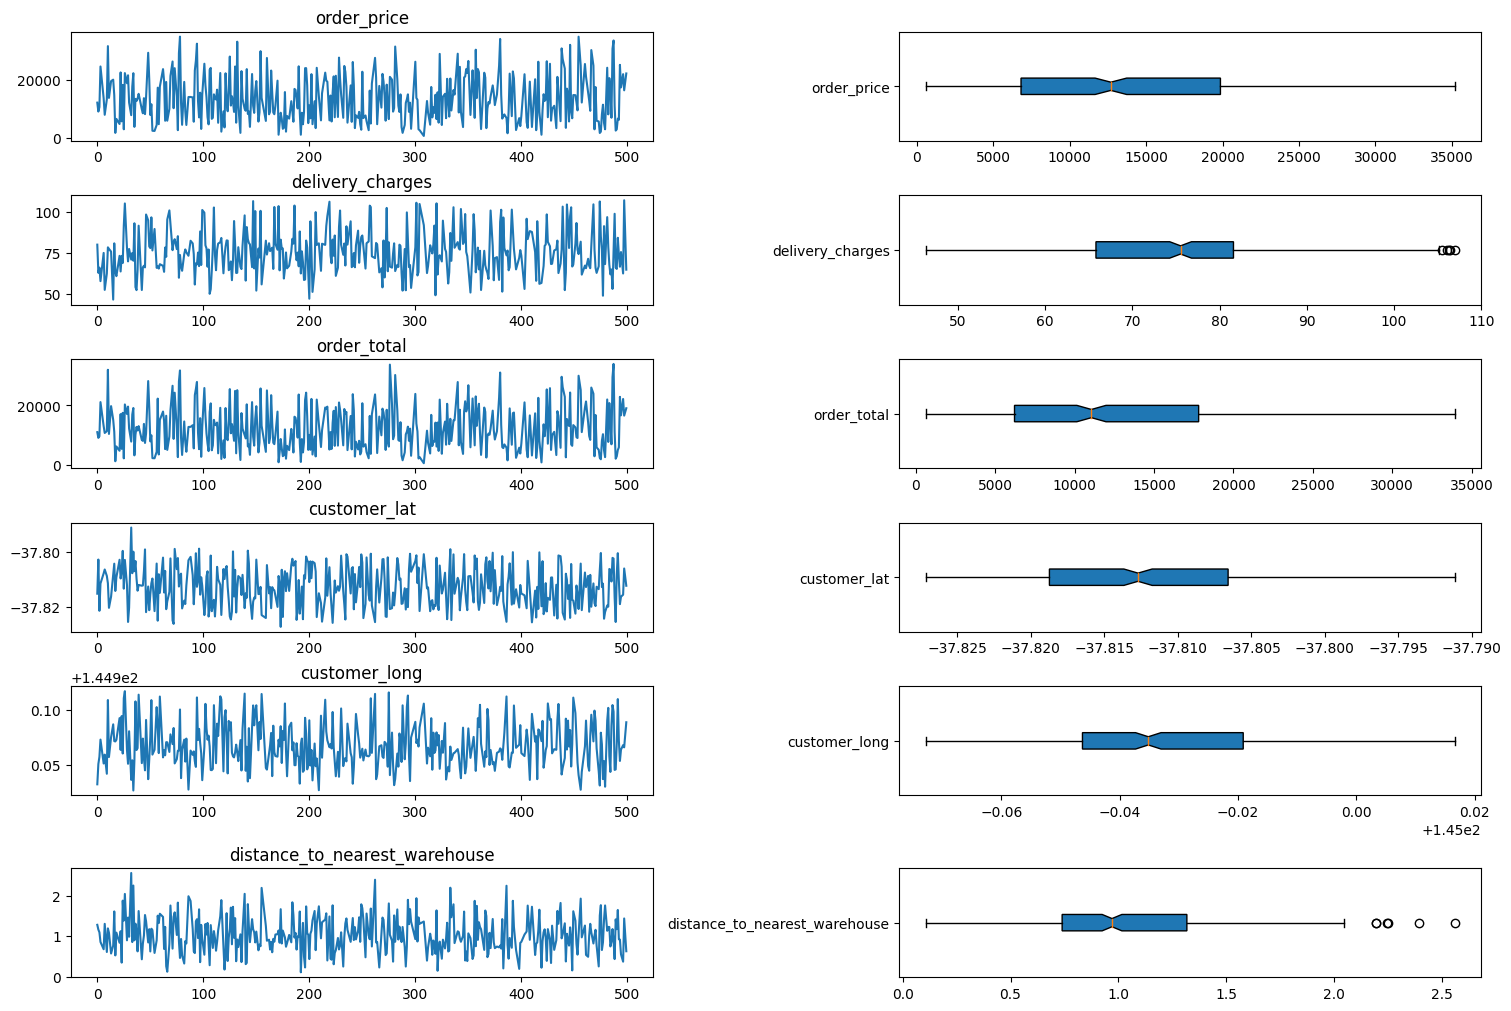

In [650]:
fig = plt.figure(figsize=(15,10), layout='constrained')
gs = GridSpec(nrows=6, ncols=2, figure=fig)
plt.subplot(gs[0,0])
plt.plot(dirty_data['order_price'])
plt.title('order_price')

plt.subplot(gs[0,1])
plt.boxplot(dirty_data['order_price'], notch=True, vert=False, patch_artist=True, labels=['order_price'])
#plt.title('order_price')

plt.subplot(gs[1,0])
plt.plot(dirty_data['delivery_charges'])
plt.title('delivery_charges')

plt.subplot(gs[1,1])
plt.boxplot(dirty_data['delivery_charges'], notch=True, vert=False, patch_artist=True, labels=['delivery_charges'])
#plt.title('delivery_charges')

plt.subplot(gs[2,0])
plt.plot(dirty_data['order_total'])
plt.title('order_total')

plt.subplot(gs[2,1])
plt.boxplot(dirty_data['order_total'], notch=True, vert=False, patch_artist=True, labels=['order_total'])
#plt.title('order_total')

plt.subplot(gs[3,0])
plt.plot(dirty_data['customer_lat'])
plt.title('customer_lat')

plt.subplot(gs[3,1])
plt.boxplot(dirty_data['customer_lat'], notch=True, vert=False, patch_artist=True, labels=['customer_lat'])
#plt.title('customer_lat')

plt.subplot(gs[4,0])
plt.plot(dirty_data['customer_long'])
plt.title('customer_long')

plt.subplot(gs[4,1])
plt.boxplot(dirty_data['customer_long'], notch=True, vert=False, patch_artist=True, labels=['customer_long'])
#plt.title('customer_long')

plt.subplot(gs[5,0])
plt.plot(dirty_data['distance_to_nearest_warehouse'])
plt.title('distance_to_nearest_warehouse')

plt.subplot(gs[5,1])
plt.boxplot(dirty_data['distance_to_nearest_warehouse'], notch=True, vert=False, patch_artist=True, labels=['distance_to_nearest_warehouse'])
#plt.title('distance_to_nearest_warehouse')

# Data Processing

In [651]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = dirty_data
df_autumn = df[df['season'] == 'Autumn']
df_spring = df[df['season'] == 'Spring']
df_summer = df[df['season'] == 'Summer']
df_winter = df[df['season'] == 'Winter']


def analyze_season(season_df):
    revenue = season_df['order_price'].sum()
    mean_price = season_df['order_price'].mean()
    variance_price = season_df['order_price'].var()
    return revenue, mean_price, variance_price

revenue_autumn, mean_price_autumn, variance_price_autumn = analyze_season(df_autumn)
revenue_spring, mean_price_spring, variance_price_spring = analyze_season(df_spring)
revenue_summer, mean_price_summer, variance_price_summer = analyze_season(df_summer)
revenue_winter, mean_price_winter, variance_price_winter = analyze_season(df_winter)


print(f'Autumn:')
print(f'Revenue: {revenue_autumn}')
print(f'Mean price: {mean_price_autumn}')
print(f'Variance price: {variance_price_autumn}')

print(f'Spring:')
print(f'Revenue: {revenue_spring}')
print(f'Mean price: {mean_price_spring}')
print(f'Variance price: {variance_price_spring}')

print(f'Summer:')
print(f'Revenue: {revenue_summer}')
print(f'Mean price: {mean_price_summer}')
print(f'Variance price: {variance_price_summer}')

print(f'Winter:')
print(f'Revenue: {revenue_winter}')
print(f'Mean price: {mean_price_winter}')
print(f'Variance price: {variance_price_winter}')

Autumn:
Revenue: 1450200
Mean price: 13681.132075471698
Variance price: 68801453.46810421
Spring:
Revenue: 1324384
Mean price: 13940.884210526316
Variance price: 61403918.52900337
Summer:
Revenue: 1329837
Mean price: 13709.659793814433
Variance price: 72755514.03930412
Winter:
Revenue: 1236242
Mean price: 13013.073684210527
Variance price: 62185801.77110863


Text(0.5, 1.0, 'Vanriance price by season')

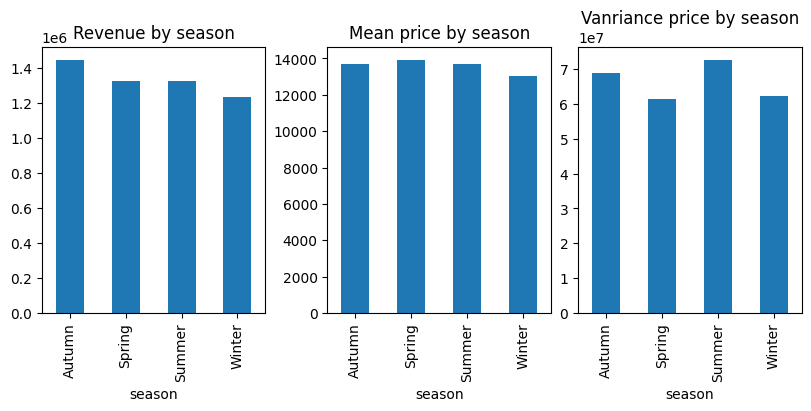

In [652]:
fig = plt.figure(figsize=(8,4),layout='constrained')
plt.subplot(1, 3, 1)
dirty_data.groupby('season')['order_price'].sum().plot.bar(x='Season',y='Revenue')
plt.title('Revenue by season')
plt.subplot(1, 3, 2)
dirty_data.groupby('season')['order_price'].mean().plot.bar(x='Season',y='Mean price')
plt.title('Mean price by season')
plt.subplot(1, 3, 3)
dirty_data.groupby('season')['order_price'].var().plot.bar(x='Season',y='Variance price')
plt.title('Vanriance price by season')

<Axes: title={'center': 'order_price'}, xlabel='[season]'>

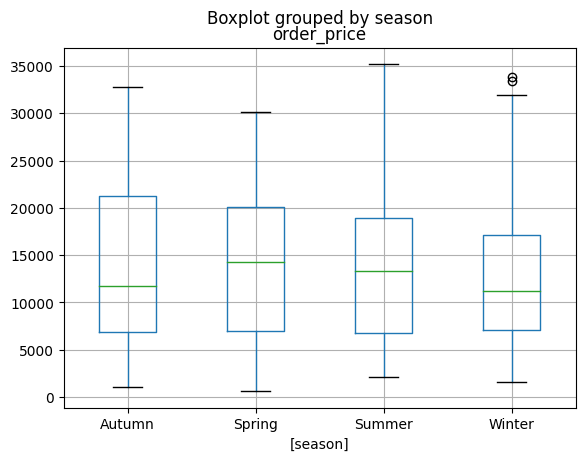

In [653]:
dirty_data.loc[:,['order_price','season']].boxplot(by='season')

In [654]:
dirty_data.groupby(by='season')['order_price'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Autumn,106.0,13681.132075,8294.664156,1010.0,6915.0,11782.5,21261.25,32745.0
Spring,95.0,13940.884211,7836.065245,585.0,7000.0,14320.0,20085.00,30140.0
Summer,97.0,13709.659794,8529.684287,2090.0,6740.0,13270.0,18960.00,35205.0
Winter,95.0,13013.073684,7885.797472,1525.0,7125.0,11230.0,17100.00,33870.0


In [655]:
dirty_data['coupon_discount'].unique()

array([10,  0, 15,  5, 25])

In [656]:
dirty_data.groupby('coupon_discount')['order_id'].count()

coupon_discount
0     80
5     76
10    80
15    82
25    75
Name: order_id, dtype: int64

In [657]:
dirty_data.groupby('coupon_discount')['order_id'].count()/dirty_data.groupby('coupon_discount')['order_id'].count().sum()*100

coupon_discount
0     20.356234
5     19.338422
10    20.356234
15    20.865140
25    19.083969
Name: order_id, dtype: float64

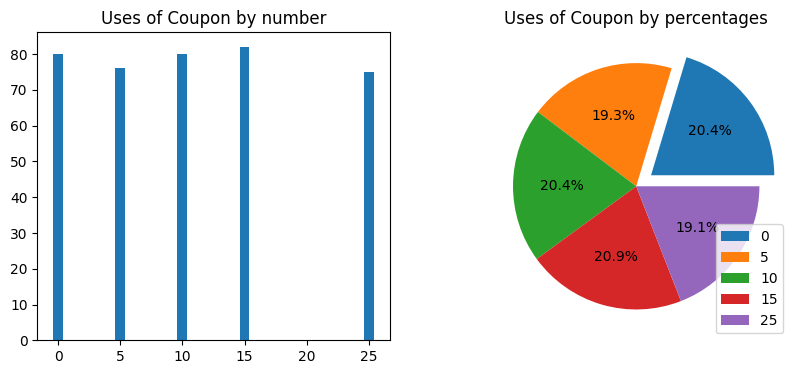

In [658]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4))

labels=sorted(dirty_data['coupon_discount'].unique())
counts=dirty_data.groupby('coupon_discount')['order_id'].count().tolist()
sizes = (dirty_data.groupby('coupon_discount')['order_id'].count()
        /dirty_data.groupby('coupon_discount')['order_id'].count().sum()*100)
explode = (0.15, 0, 0, 0, 0)

ax0.bar(labels, counts)
ax0.set_title('Uses of Coupon by number')

ax1.pie(sizes, autopct='%1.1f%%', explode=explode)
ax1.set_title('Uses of Coupon by percentages')
ax1.legend(labels, loc='lower right')

In [659]:
dirty_data['delivery_charges'].loc[dirty_data['is_expedited_delivery']==True].describe()

count    195.000000
mean      83.612051
std       12.522732
min       57.930000
25%       76.760000
50%       80.660000
75%       94.160000
max      106.980000
Name: delivery_charges, dtype: float64

In [660]:
dirty_data['delivery_charges'].loc[dirty_data['is_expedited_delivery']==False].describe()

count    198.000000
mean      67.656616
std        8.892978
min       46.350000
25%       62.990000
50%       66.955000
75%       74.780000
max       87.010000
Name: delivery_charges, dtype: float64

<Axes: title={'center': 'delivery_charges'}, xlabel='[is_expedited_delivery]'>

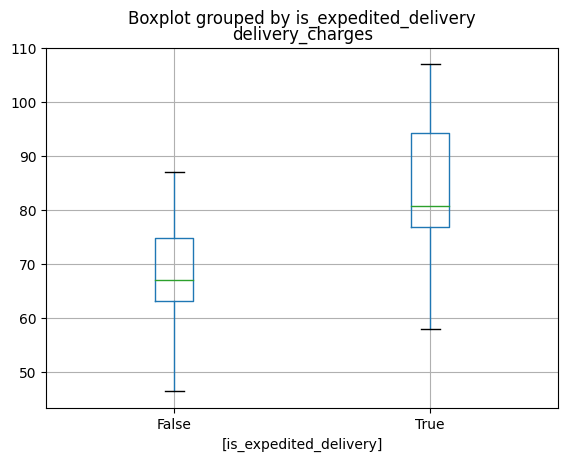

In [661]:
dirty_data.loc[:, ['delivery_charges', 'is_expedited_delivery']].boxplot(by='is_expedited_delivery')